<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/9thWeekTask/SVM_Regression_for_CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/CreditDataset.csv'

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 20), (200, 20), (800,), (200,))

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report

# Buat model SVM Regression
svm_regressor = SVR(kernel='rbf')  # Kernel RBF digunakan untuk menangkap pola non-linear
svm_regressor.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = svm_regressor.predict(X_test)

# Karena SVM Regression memberikan prediksi kontinu, kita bulatkan ke nilai diskrit (1 atau 2)
y_pred_rounded = [round(pred) for pred in y_pred]

# Buat confusion matrix dan classification report
conf_matrix = confusion_matrix(y_test, y_pred_rounded)
class_report = classification_report(y_test, y_pred_rounded)

# conf_matrix, class_report
from sklearn.metrics import classification_report

# Pisahkan dan cetak classification report dengan format rapi
print("Classification Report:")
print("=" * 22)

report_lines = class_report.split("\n")
print(f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
print("-" * 50)

# Cetak baris per baris untuk masing-masing kelas
for line in report_lines[2:-3]:  # Bagian ini memuat kelas 1 dan 2
    if line.strip():
        print(line)

# Tambahkan baris untuk 'macro avg' dan 'weighted avg'
for line in report_lines[-3:-1]:  # Bagian ini memuat avg statistik
    if line.strip():
        print(line)

print("=" * 50)


Classification Report:
Class          Precision Recall    F1-Score  Support   
--------------------------------------------------
           1       0.82      0.92      0.87       141
           2       0.73      0.51      0.60        59
    accuracy                           0.80       200
   macro avg       0.77      0.72      0.73       200
weighted avg       0.79      0.80      0.79       200


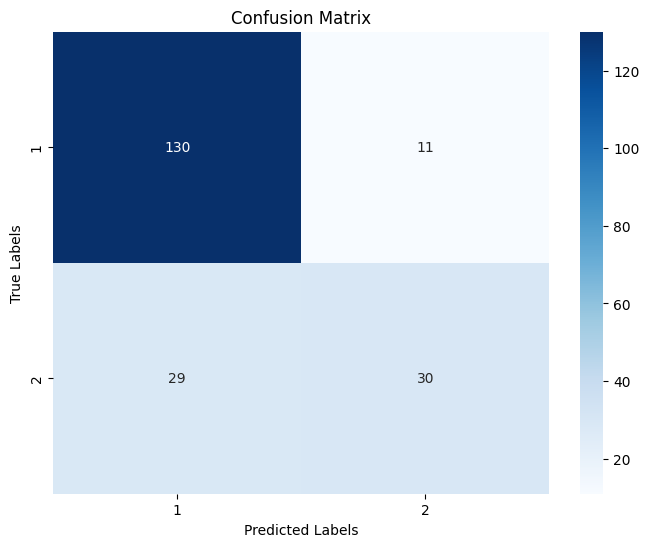

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
